In [1]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('./dataset/RSW-dataset.xlsx')

In [58]:
df.columns

Index(['NUGGET.WIDTH.1', 'MATERIAL.1', 'THICKNESS.1', 'COATING.EG.1',
       'COATING.HDG.1', 'COATING.WEIGHT.1', 'SURFACE.CLASS.1', 'MATERIAL.2',
       'THICKNESS.2', 'COATING.EG.2', 'COATING.HDG.2', 'COATING.WEIGHT.2',
       'SURFACE.CLASS.2', 'WELD.FORCE', 'WELD.CURRENT', 'WELD.TIME',
       'quality'],
      dtype='object')

In [3]:
df

,NUGGET.WIDTH.1,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
0,3.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
1,4.4,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
2,4.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
3,4.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0
4,5.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0
1122,4.8,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0
1123,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0
1124,4.7,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0


Option 1 — Data-Driven

In [4]:
mean_width = df['NUGGET.WIDTH.1'].mean()
std_width = df['NUGGET.WIDTH.1'].std()
lower_limit = mean_width - std_width
upper_limit = mean_width + std_width

df['quality'] = df['NUGGET.WIDTH.1'].apply(
    lambda x: 1 if lower_limit <= x <= upper_limit else 0
).copy()

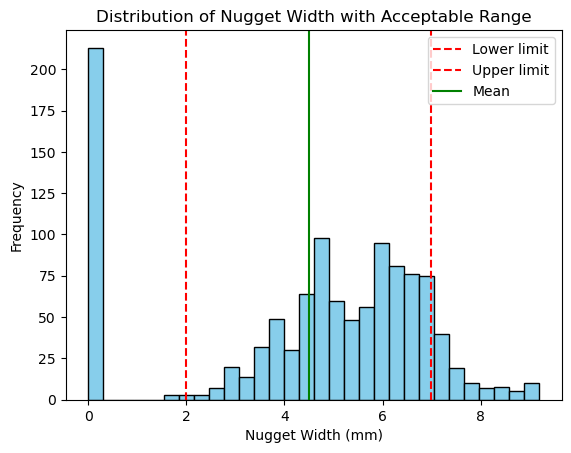

In [32]:
plt.hist(df['NUGGET.WIDTH.1'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_limit, color='red', linestyle='--', label='Lower limit')
plt.axvline(upper_limit, color='red', linestyle='--', label='Upper limit')
plt.axvline(mean_width, color='green', linestyle='-', label='Mean')
plt.xlabel("Nugget Width (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Nugget Width with Acceptable Range")
plt.legend()
plt.show()

In [5]:
df

,NUGGET.WIDTH.1,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME,quality
0,3.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,1
1,4.4,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,1
2,4.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,1
3,4.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0,1
4,5.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0,1
1122,4.8,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0,1
1123,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0,1
1124,4.7,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0,1


In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (900, 17)
test_df.shape: (226, 17)


In [8]:
input_cols = list(train_df.columns)[:-1]
target_col = 'quality'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [10]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [11]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [12]:
train_inputs[numeric_cols].describe()

,NUGGET.WIDTH.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,4.421778,1.197944,0.008889,0.567778,40.195556,1.864444,1.348167,0.0,0.567778,40.195556,1.864444,884.811111,7.960633,357.078822
std,2.516334,0.161210,0.093913,0.495660,36.312045,0.991321,0.315293,0.0,0.495660,36.312045,0.991321,123.369869,1.738287,161.560156
min,0.000000,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000
25%,3.475000,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000
50%,5.000000,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.100000,300.060000
75%,6.300000,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000
max,9.200000,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000


In [13]:
train_inputs[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [14]:
df[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [16]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [17]:
encoder.categories_

[array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object),
 array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object)]

In [18]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['MATERIAL.1_Material_A', 'MATERIAL.1_Material_B', 'MATERIAL.1_Material_C', 'MATERIAL.1_Material_D', 'MATERIAL.1_Material_E', 'MATERIAL.2_Material_A', 'MATERIAL.2_Material_B', 'MATERIAL.2_Material_C', 'MATERIAL.2_Material_D', 'MATERIAL.2_Material_E']


In [19]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [20]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (900, 26)
train_targets: (900,)
test_inputs: (226, 26)
test_targets: (226,)


In [21]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [45]:
def evalute(targets, predictions,  name=''):
    print(name)
    accuracy = accuracy_score(targets, predictions)
    print("accuracy_score:", accuracy)
    
    print("confusion matrix")
    sns.heatmap(confusion_matrix(targets, predictions), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Weld Quality Classification")
    plt.show()

# Logistric regression


In [47]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

Training
accuracy_score: 0.8866666666666667
confusion matrix


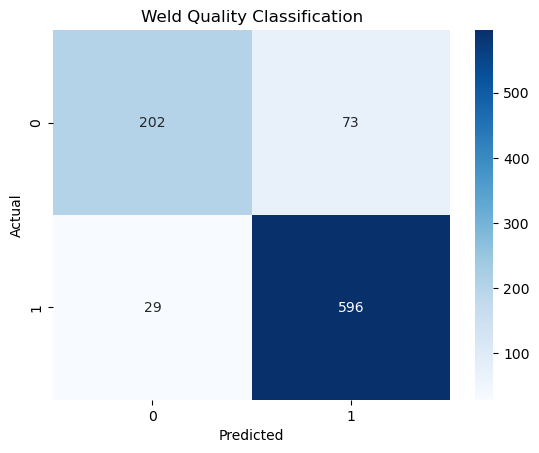

In [57]:
train_preds = log_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
accuracy_score: 0.8539823008849557
confusion matrix


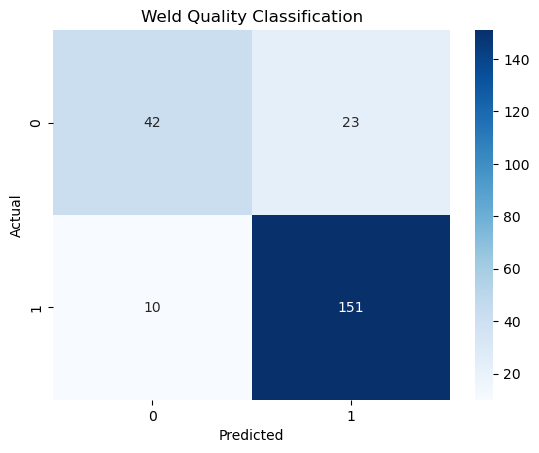

In [49]:
test_preds = log_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

# Decision tree


In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, train_targets)

DecisionTreeClassifier()

Training
accuracy_score: 1.0
confusion matrix


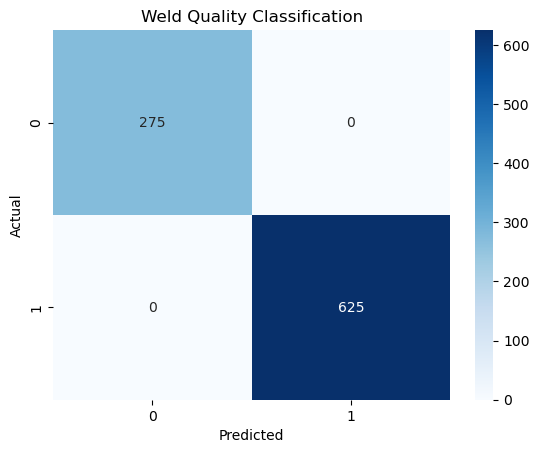

In [51]:
train_preds = dt_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
accuracy_score: 1.0
confusion matrix


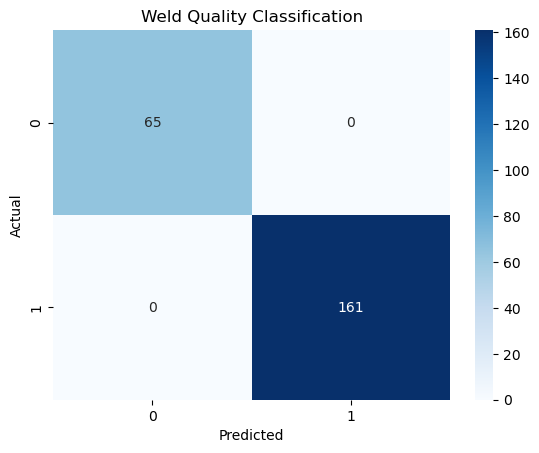

In [52]:
test_preds = dt_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

# Random forest

In [53]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, train_targets)

RandomForestClassifier()

Training
accuracy_score: 1.0
confusion matrix


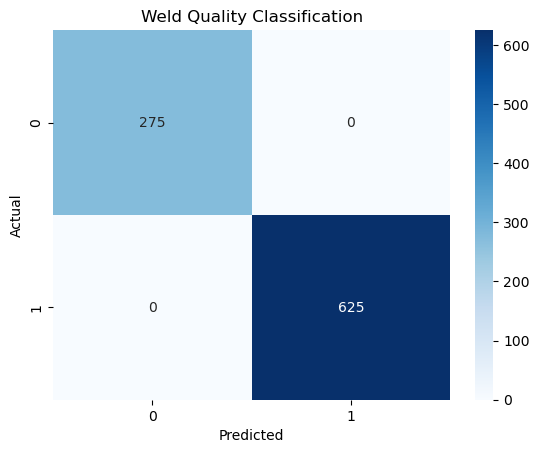

In [54]:
train_preds = rf_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
accuracy_score: 0.995575221238938
confusion matrix


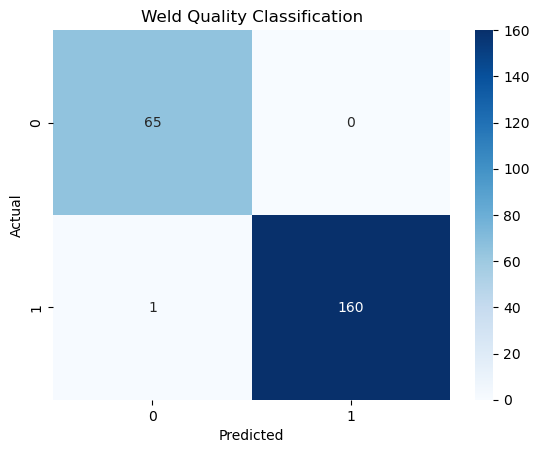

In [55]:
test_preds = rf_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")